In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


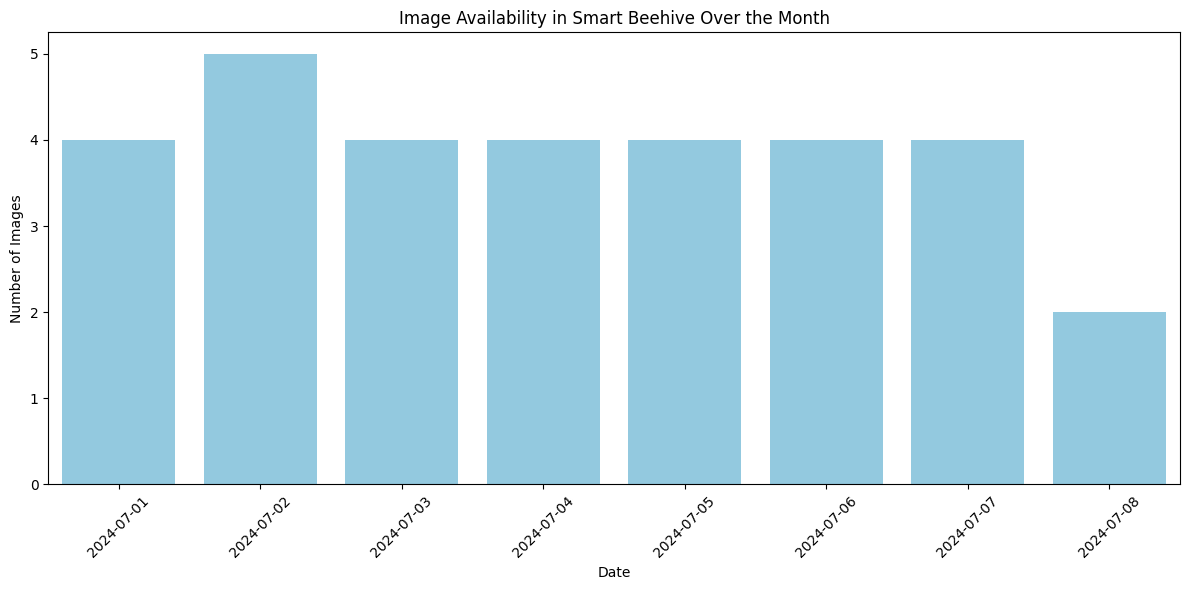

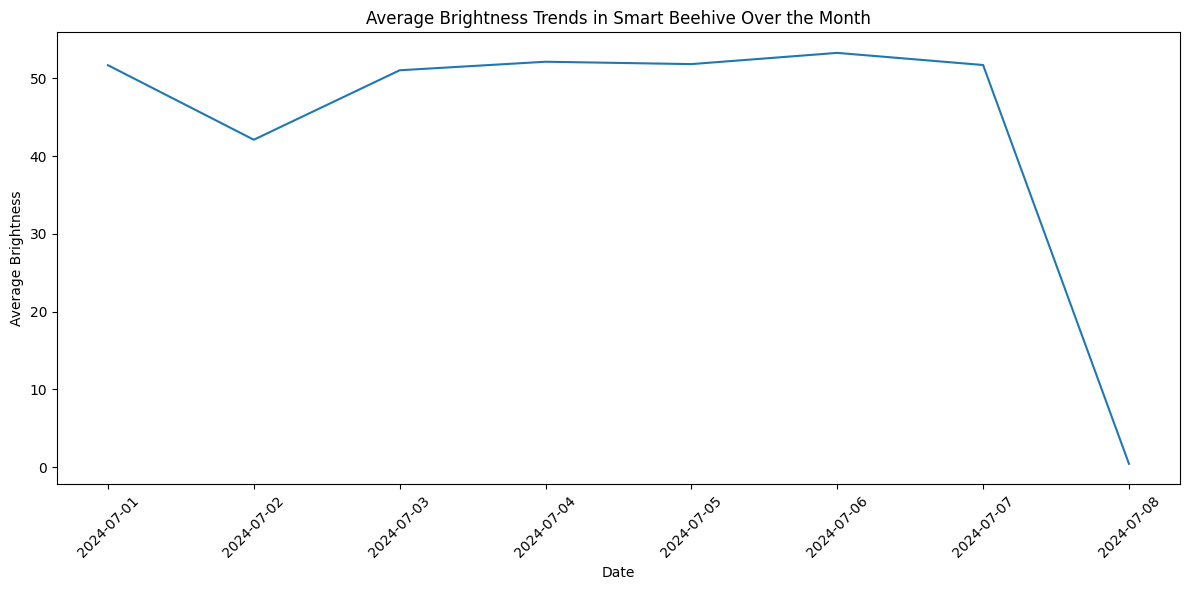

In [5]:
import cv2
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

def calculate_average_brightness(image_path):
    image = cv2.imread(image_path)
    if image is not None:
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        average_brightness = np.mean(gray_image)
        return average_brightness
    else:
        return 0

def process_images_in_folder(folder_path):
    data = []
    for image_file in os.listdir(folder_path):
        if image_file.endswith(('.jpg', '.jpeg', '.png')):
            image_path = os.path.join(folder_path, image_file)
            # Extract date from filename (format: 1_YYYY-MM-DD_HHMMSS.jpg)
            try:
                date_str = image_file.split('_')[1]  # Extract YYYY-MM-DD
                date = datetime.strptime(date_str, '%Y-%m-%d')
            except ValueError:
                # Handle cases where date extraction fails
                date = None
            average_brightness = calculate_average_brightness(image_path)
            if date is not None:
                data.append((date, average_brightness))
    return pd.DataFrame(data, columns=['date', 'average_brightness'])

def analyze_availability(df):
    # Create a DataFrame with a continuous date range
    start_date = df['date'].min()
    end_date = df['date'].max()
    all_dates = pd.date_range(start=start_date, end=end_date, freq='D')
    availability_df = pd.DataFrame(all_dates, columns=['date'])

    # Count images per day
    image_counts = df['date'].value_counts().sort_index()
    availability_df = availability_df.set_index('date').join(image_counts.rename('image_count'))
    availability_df = availability_df.fillna(0).reset_index()

    return availability_df

def visualize_availability(df):
    plt.figure(figsize=(12, 6))
    sns.barplot(data=df, x='date', y='image_count', color='skyblue')
    plt.xlabel('Date')
    plt.ylabel('Number of Images')
    plt.title('Image Availability in Smart Beehive Over the Month')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

def visualize_brightness_trends(df):
    df['date'] = pd.to_datetime(df['date'])
    df.set_index('date', inplace=True)
    df = df.resample('D').mean()  # Resample to daily frequency

    plt.figure(figsize=(12, 6))
    sns.lineplot(data=df, x=df.index, y='average_brightness')
    plt.xlabel('Date')
    plt.ylabel('Average Brightness')
    plt.title('Average Brightness Trends in Smart Beehive Over the Month')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Folder containing images in Google Drive
image_folder = '/content/drive/My Drive/images'

# Process all images in the folder
df = process_images_in_folder(image_folder)

# Analyze and visualize availability
availability_df = analyze_availability(df)
visualize_availability(availability_df)

# Visualize brightness trends
visualize_brightness_trends(df)